In [34]:
import pandas as pd 
import numpy as np 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('data/materias_enriquecida.csv')

In [14]:
df['n_frases'] = df['artigo_ex'].fillna('').apply(lambda x: len(x.split('.')))
df['n_palavras'] = df['artigo_ex'].fillna('').apply(lambda x: len(x.split(' ')))

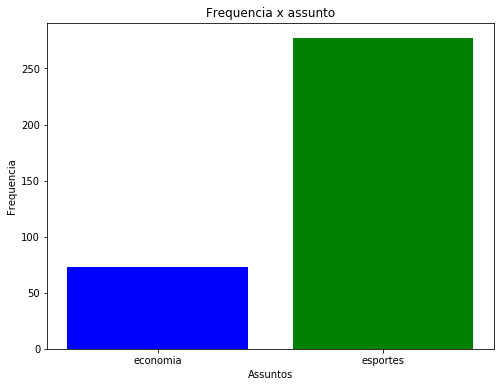

In [15]:
agrupado = df.groupby('assunto')['titulo'].count().reset_index()
plt.figure(figsize=(8, 6))  

cores = ['blue', 'green', 'red', 'yellow', 'orange']

for i, categoria in enumerate(agrupado['assunto']):
    plt.bar(categoria, agrupado['titulo'][i], color=cores[i])

plt.xlabel('Assuntos')
plt.ylabel('Frequencia')
plt.title('Frequencia x assunto')

plt.show()

In [16]:
df.isna().sum()

data                  0
url_noticia           0
url_noticia_curto     0
titulo                0
conteudo_noticia      0
assunto               0
assunto_ex           89
titulo_ex            30
subtitulo_ex          0
local_ex              2
artigo_ex             1
n_paragrafos          0
n_frases              0
n_palavras            0
dtype: int64

In [36]:
vectorizer = CountVectorizer()

dfi = df.dropna(subset = ['artigo_ex'])

X = vectorizer.fit_transform(dfi['artigo_ex'])
y = dfi['assunto']

# Divida os dados em conjuntos de treinamento e teste (por exemplo, 80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


# Treinamento do modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

# Previsão
predict = modelo.predict(X_test)


In [41]:
(predict == y_test).sum()/ len(predict)

0.9886363636363636

In [33]:
df_teste[['assunto', 'previsao']].drop_duplicates()

,assunto,previsao
262,esportes,esportes
